In [3]:
import numpy as np
import pandas as pd

data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Joane'], 
        'age': [42, 52, 42, 24, 73, 52], 
        'preTestScore': [4, 24, 31, 4, 3, 28],
        'postTestScore': [25, 94, 57, 62, 70, 76],
        'sex': ['M', 'F', 'F', 'M', 'F', 'F']}
df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore', 'sex'])
df

,name,age,preTestScore,postTestScore,sex
0,Jason,42,4,25,M
1,Molly,52,24,94,F
2,Tina,42,31,57,F
3,Jake,24,4,62,M
4,Amy,73,3,70,F
5,Joane,52,28,76,F


In [5]:
# Menghitung rata-rata
df['preTestScore'].mean()

15.666666666666666

In [6]:
df['preTestScore'].mode()

0    4
dtype: int64

In [7]:
df['age'].mode()

0    42
1    52
dtype: int64

In [8]:
df['preTestScore'].cumsum()

0     4
1    28
2    59
3    63
4    66
5    94
Name: preTestScore, dtype: int64

In [9]:
df['preTestScore'].count()

6

In [10]:
df.describe()

,age,preTestScore,postTestScore
count,6.000000,6.000000,6.000000
mean,47.500000,15.666667,64.000000
std,16.146207,13.336666,23.039097
min,24.000000,3.000000,25.000000
25%,42.000000,4.000000,58.250000
50%,47.000000,14.000000,66.000000
75%,52.000000,27.000000,74.500000
max,73.000000,31.000000,94.000000


In [11]:
df.age.quantile([0.25,0.5,0.75])

0.25    42.0
0.50    47.0
0.75    52.0
Name: age, dtype: float64

In [12]:
np.percentile(df.age,25), np.percentile(df.age,75)

(42.0, 52.0)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


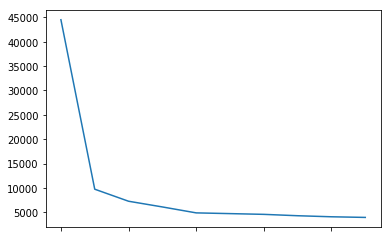

In [18]:
count = reviews['province'].value_counts().head(10).plot.line()

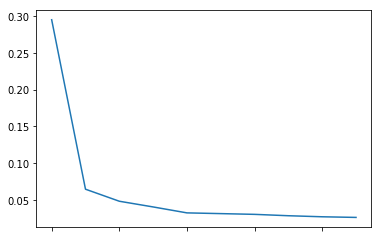

In [19]:
count = (reviews['province'].value_counts().head(10)/len(reviews)).plot.line()

In [42]:
# Normalisasi Price dan points, cek dengan describe
# Standarisasi price dan points, cek dengan describe

data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Joane'], 
        'age': [42, 52, 42, 24, 73, 52], 
        'preTestScore': [4, 24, 31, 4, 3, 28],
        'postTestScore': [25, 94, 57, 62, 70, 76],
        'sex': ['M', 'F', 'F', 'M', 'F', 'F']}
df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore', 'sex'])
df

,name,age,preTestScore,postTestScore,sex
0,Jason,42,4,25,M
1,Molly,52,24,94,F
2,Tina,42,31,57,F
3,Jake,24,4,62,M
4,Amy,73,3,70,F
5,Joane,52,28,76,F


In [32]:
min_pre = df['preTestScore'].min()
min_pre

3

In [33]:
max_pre = df['postTestScore'].max()
max_pre

94

In [41]:
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

df_norm = df
min_max_scaler = preprocessing.MinMaxScaler()
df_norm[['age', 'preTestScore', 'postTestScore']] = min_max_scaler.fit_transform(df_norm[['age', 'preTestScore', 'postTestScore']])
# df_norm
print(df_norm)
print(df)

    name       age  preTestScore  postTestScore sex
0  Jason  0.367347      0.035714       0.000000   M
1  Molly  0.571429      0.750000       1.000000   F
2   Tina  0.367347      1.000000       0.463768   F
3   Jake  0.000000      0.035714       0.536232   M
4    Amy  1.000000      0.000000       0.652174   F
5  Joane  0.571429      0.892857       0.739130   F
    name       age  preTestScore  postTestScore sex
0  Jason  0.367347      0.035714       0.000000   M
1  Molly  0.571429      0.750000       1.000000   F
2   Tina  0.367347      1.000000       0.463768   F
3   Jake  0.000000      0.035714       0.536232   M
4    Amy  1.000000      0.000000       0.652174   F
5  Joane  0.571429      0.892857       0.739130   F


In [43]:
df_stand = df
standard_scaler = preprocessing.StandardScaler()
df_stand[['age', 'preTestScore', 'postTestScore']] = standard_scaler.fit_transform(df_stand[['age', 'preTestScore', 'postTestScore']])
df_stand

,name,age,preTestScore,postTestScore,sex
0,Jason,-0.373149,-0.958275,-1.854342,M
1,Molly,0.305304,0.684482,1.426417,F
2,Tina,-0.373149,1.259447,-0.332831,F
3,Jake,-1.594366,-0.958275,-0.095094,M
4,Amy,1.730057,-1.040413,0.285283,F
5,Joane,0.305304,1.013034,0.570567,F


In [38]:
df_norm.describe()

,age,preTestScore,postTestScore
count,6.000000e+00,6.000000e+00,6.000000e+00
mean,-9.251859e-18,-7.401487e-17,9.251859e-17
std,1.095445e+00,1.095445e+00,1.095445e+00
min,-1.594366e+00,-1.040413e+00,-1.854342e+00
25%,-3.731494e-01,-9.582749e-01,-2.733965e-01
50%,-3.392268e-02,-1.368964e-01,9.509445e-02
75%,3.053041e-01,9.308957e-01,4.992459e-01
max,1.730057e+00,1.259447e+00,1.426417e+00
